In [735]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stemgraphic as sg
import re
from array import array

In [736]:
# Dataset
#df = pd.read_csv('hombres.csv')
df = pd.read_csv('mujeres.csv')
df.head()

MUJERES
0     63.6
1     54.5
2     59.1
3     62.7
4     55.0

#### Por hacer
- ✅ Crear una funcion para obtener la media de datos agrupados
- ✅ Crear una funcion para obtener la moda de datos agrupados
- ✅ Crear una funcion para obtener la mediana de datos agrupados
- ✅ Crear una funcion para obtener la varianza de datos agrupados
- ✅ Crear una funcion para obtener el rango de datos agrupados
- ✅ Crear diagrama de tallos y hojas (¿hacer en excel?)
- ✅ Crear diagrama de puntos 
- Crear tabla de datos agrupados 
- Comparar ambas tablas
- Crear script
- Documento PDF

#### Variables globales

In [737]:
# Rango y numero de elementos
rango = df.max() - df.min()
n = df.shape[0]

nombre_columna = df.columns[0]

# Numero de clases
if n < 30:
    numero_clases = int(np.ceil(np.sqrt(n)))
else:
    numero_clases = int(np.ceil(1 + (3.322 * np.log10(n))))

# Amplitud
amplitud = rango / numero_clases
n

35

#### Funciones por hacer

In [738]:
# Funcion para obtener la media
def media_agrupada(tabla_frecuencias, n):
    tabla_frecuencias['x_i * f_i'] = tabla_frecuencias['Marca de clase'] * tabla_frecuencias['Frecuencia absoluta']
    sum_xifi = float(tabla_frecuencias['x_i * f_i'].sum())
    media_agrupada = sum_xifi / n
    return media_agrupada

In [739]:
# Funcion para obtener la clase a la que pertenece la moda
def moda_clase(tabla_frecuencias):
    clase = 0
    frecuencia_mayor = tabla_frecuencias['Frecuencia absoluta'].max()

    for i in tabla_frecuencias['Frecuencia absoluta']:
            clase += 1
            if i == frecuencia_mayor:
                return clase

# Funcion para obtener la moda
def moda_agrupada(moda_clase, amplitud, tabla_frecuencias, intervalos_float):
    limite_inferior = min(intervalos_float[moda_clase - 1]) 
    delta_1 = tabla_frecuencias['Frecuencia absoluta'].iloc[moda_clase - 1] - tabla_frecuencias['Frecuencia absoluta'].iloc[moda_clase - 2]
    delta_2 = tabla_frecuencias['Frecuencia absoluta'].iloc[moda_clase - 1] - tabla_frecuencias['Frecuencia absoluta'].iloc[moda_clase]
    moda_agrupada = limite_inferior + ((delta_1) / (delta_1 + delta_2)) * amplitud
    return moda_agrupada

In [740]:
# Funcion para la posicion de la clase en la que se encuentra la mediana
def mediana_clase(n, tabla_frecuencias):
    posicion = (n + 1) / 2
    clase = 0

    for i in tabla_frecuencias['Frecuencia acumulada']:
        clase += 1
        if i >= posicion:
            #clase_mediana = tabla_frecuencias[tabla_frecuencias['Frecuencia acumulada']== i].index.values
            return clase

# Funcion para obtener la mediana
def mediana_agrupada(mediana_clase, amplitud, tabla_frecuencias, intervalos_float):
    limite_inferior = min(intervalos_float[mediana_clase - 1]) 
    frec_acum_anterior = tabla_frecuencias['Frecuencia acumulada'].iloc[mediana_clase - 2]
    frec_absoluta = tabla_frecuencias['Frecuencia absoluta'].iloc[mediana_clase -1]
    mediana_agrupada = limite_inferior + (((n / 2) - frec_acum_anterior) / frec_absoluta ) * amplitud

    return mediana_agrupada

In [741]:
# Funcion para obtener la varianza
def varianza_agrupada(tabla_frecuencias, n, media_agrupada):
    tabla_frecuencias['(x_i - \mu)^2'] = ((tabla_frecuencias['Marca de clase'] - media_agrupada) ** 2)
    tabla_frecuencias['(x_i - \mu)^2 * f_i'] = tabla_frecuencias['(x_i - \mu)^2'] * tabla_frecuencias['Frecuencia absoluta']
    sumatoria = tabla_frecuencias['(x_i - \mu)^2 * f_i'].sum()
    varianza_agrupada = (sumatoria) / (n - 1)
    return varianza_agrupada

In [742]:
# Funcion para obtener el rango
def rango_agrupado(tabla_frecuencias):
    rango = tabla_frecuencias['Marca de clase'].max() - tabla_frecuencias['Marca de clase'].min()
    return rango

#### Grafica de tallo y hoja

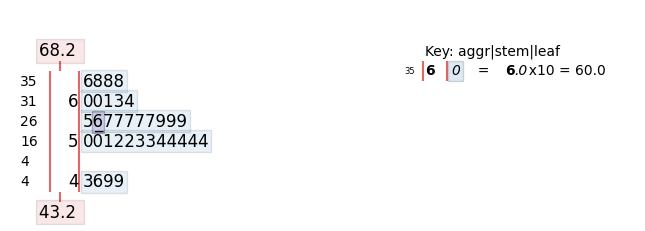

In [743]:
# Genera la grafica de tallo y hoja
# Arreglo con los valores
test_array = df[nombre_columna].to_numpy()
fig, test_array = sg.stem_graphic(test_array)

#### Diagrama de puntos

In [744]:
# Funcion para generar el diagrama de puntos
def dotplot(input_x, **args):

    # Count how many times does each value occur
    unique_values, counts = np.unique(input_x, return_counts = True)
    
    # Convert 1D input into 2D array
    scatter_x = [] # x values 
    scatter_y = [] # corresponding y values
    for idx, value in enumerate(unique_values):
        for counter in range(1, counts[idx]+1):
            scatter_x.append(value)
            scatter_y.append(counter)

    # draw dot plot using scatter() 
    plt.scatter(scatter_x, scatter_y, s = 10, c = "#000000", **args)
    
    # Optional - show all unique values on x-axis. 
    # Matplotlib might hide some of them  
    # plt.gca().set_xticks(unique_values)

    plt.autoscale(enable=True, axis='x', tight=False)

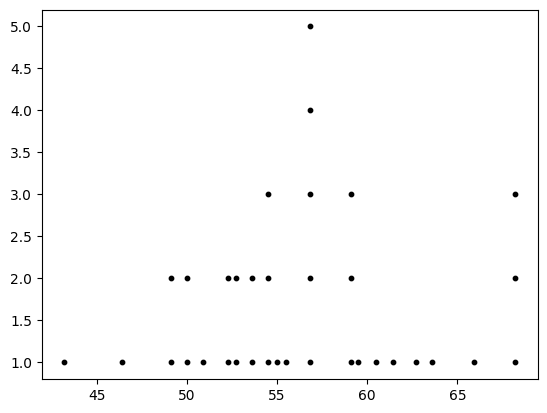

In [745]:
# Genera diagrama
test_array = df[nombre_columna].to_numpy()
dotplot(input_x = test_array)

#### Tabla de datos agrupados

In [746]:
# Por terminar, marca de clase, f_i * x_i, ..., optimizar codigo
nombre_columna = df.columns[0]
clases = df[nombre_columna].value_counts(bins = numero_clases, sort = False)
tabla_frecuencias = pd.DataFrame(clases)
tabla_frecuencias.rename(columns = {'count':'Frecuencia absoluta'}, inplace = True)
frecuencia_acumulada = []
acumulador = 0

# Columna: frecuencia absoluta relativa
tabla_frecuencias['Frecuencia absoluta relativa'] = tabla_frecuencias['Frecuencia absoluta'] / n

# Columna: frecuencia acumulada
for i in tabla_frecuencias.index:
    acumulador = acumulador + tabla_frecuencias['Frecuencia absoluta'][i]
    frecuencia_acumulada.append(acumulador)

# Columnas: f. acumulada 
tabla_frecuencias['Frecuencia acumulada'] = frecuencia_acumulada

# Columna: frecuencia acumulada relativa
tabla_frecuencias['Frecuencia acumulada relativa'] = tabla_frecuencias['Frecuencia acumulada'] / n

# Arreglo de intervalos
# "[0-9]+.[0-9]+, [0-9]+.[0-9]+"gm
intervalos_str = []
intervalos_float = []
marca_clase = []

clases_lista = clases.index

for i in clases_lista:
    matched = re.search("[0-9]+.[0-9]+, [0-9]+.[0-9]+", str(i))
    intervalos_str.append(matched.group())
    
for i in intervalos_str:
    intervalos_float.append(i.split(', '))

for i in intervalos_float:
    for j in i:
        j = float(j)

intervalos_float = np.array(intervalos_float, dtype = float)

for i in intervalos_float:
    marca_clase.append(np.sum(i) / 2)

# Columna: marca de clase
tabla_frecuencias['Marca de clase'] = marca_clase

tabla_frecuencias

Frecuencia absoluta  Frecuencia absoluta relativa   
MUJERES                                                               
(43.174, 46.771]                    2                      0.057143  \
(46.771, 50.343]                    4                      0.114286   
(50.343, 53.914]                    7                      0.200000   
(53.914, 57.486]                   10                      0.285714   
(57.486, 61.057]                    5                      0.142857   
(61.057, 64.629]                    3                      0.085714   
(64.629, 68.2]                      4                      0.114286   

                  Frecuencia acumulada  Frecuencia acumulada relativa   
MUJERES                                                                 
(43.174, 46.771]                     2                       0.057143  \
(46.771, 50.343]                     6                       0.171429   
(50.343, 53.914]                    13                       0.371429   
(53.914, 57.486]                    23                       0.657143   
(57.486, 61.057]                    28                       0.800000   
(61.057, 64.629]                    31                       0.885714   
(64.629, 68.2]                      35                       1.000000   

                  Marca de clase  
MUJERES                           
(43.174, 46.771]         44.9725  
(46.771, 50.343]         48.5570  
(50.343, 53.914]         52.1285  
(53.914, 57.486]         55.7000  
(57.486, 61.057]         59.2715  
(61.057, 64.629]         62.8430  
(64.629, 68.2]           66.4145

#### Funciones test

In [747]:
rango_agrupado = rango_agrupado(tabla_frecuencias)
rango_agrupado

21.442000000000007

In [748]:
moda_clase = moda_clase(tabla_frecuencias)
moda_agrupada = moda_agrupada(moda_clase, amplitud, tabla_frecuencias, intervalos_float)
moda_agrupada

MUJERES    55.253286
dtype: float64

In [749]:
df.mode()

MUJERES
0     56.8

In [750]:
mediana_clase = int(mediana_clase(n, tabla_frecuencias))
mediana_agrupada = mediana_agrupada(mediana_clase, amplitud, tabla_frecuencias, intervalos_float)
mediana_agrupada

MUJERES    55.521143
dtype: float64

In [751]:
df.median()

MUJERES    55.5
dtype: float64

In [752]:
# Media agrupada
#sum_xifi = float(tabla_frecuencias['x_i * f_i'].sum())
media_agrupada = media_agrupada(tabla_frecuencias, n)
media_agrupada

55.90334285714286

In [753]:
# Varianza agrupada
varianza_agrupada = varianza_agrupada(tabla_frecuencias, n, media_agrupada)
np.sqrt(varianza_agrupada)
varianza_agrupada

35.23934859957984

In [754]:
df.var(ddof = 1)

MUJERES    36.948689
dtype: float64

In [755]:
df.describe()

MUJERES
count  35.000000
mean   56.268571
std     6.078543
min    43.200000
25%    52.500000
50%    55.500000
75%    59.300000
max    68.200000